### Prediction using Supervised ML

#### `Predict the Weight of a person based on his/her Height.`

#### Linear Regression

> The term regression is used when you try to find the relationship between variables.

> In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

> Linear regression is a supervised learning algorithm because it uses true labels for training. Supervised learning algorithm should have input variable (x) and an output variable (Y) for each example.

> Linear regression uses the relationship between the data-points to draw a straight line through all them.

> This line can be used to predict future values.

### 1. Importing the required Libraries.

In [2]:
import pandas as pd #Pandas allows you to do various data manipulations.
import numpy as np  #Numpy allows you to perform various number of mathematical operations.
import matplotlib.pyplot as plt #Matplotlib allows you to create graphical user interfaces to visualize data. 
%matplotlib inline

### 2. Importing Data from the Dataset.

In [3]:
data = pd.read_csv("Height_Weight.csv") #Reading CSV file from the above link.
print("------------Data imported successfully---------------\n")
data.info()
data.head(10)#df.head() allows you to print 10 rows in your dataset.

------------Data imported successfully---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  35 non-null     float64
 1   Weight  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4
5,134.62,28.5
6,137.16,35.2
7,139.70,37.6
8,142.24,40.0
9,144.78,42.6


### 3. Visualizing the dataset graphically by ploting our data points on 2D graph.

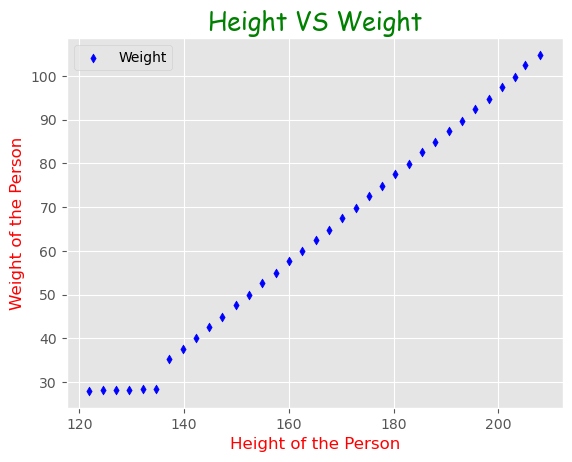

In [12]:
data.plot.scatter(x='Height', y='Weight',label='Weight', marker='d',color='blue')
plt.style.use('ggplot')
plt.title('Height VS Weight',fontsize=18,color='green',fontname='Comic Sans MS')  
plt.xlabel('Height of the Person',color='red')  
plt.ylabel('Weight of the Person',color='red')  
plt.show()

> From the Plot above, we can clearly see that there is a positive linear relation between the Height of the Person and Weight of the Person.

### 4. Preparing the Data

* The next step is to divide the data into X (inputs) and y (outputs).

In [13]:
x = data.iloc[:, :-1].values  # selecting Height of the Person as Input
y = data.iloc[:, 1].values # selecting Weight as Output

* The next step is to split this data into training and test sets. Do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
# import train_test_split method from sklearn.model_selection
from sklearn.model_selection import train_test_split  


'''
Now i have to providing a test_size of 0.5 which means testing set will contain 15 observations and 
training set will contain 15 observations.

train_test_split splits arrays or matrices into random training and testing subsets. 
That means that everytime you run it without specifying random_state, you will get a different result
of X_train, X_test, y_train, y_test data.

'''

X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                            test_size=0.5, random_state=0)

### 5. Training the Algorithm

* After spliting the data into training and testing sets, Train the model.

In [15]:
from sklearn.linear_model import LinearRegression  
lin_regressor = LinearRegression()  
lin_regressor.fit(X_train, Y_train) 

print("xxxxxxxxxxxxxx Training the Model is completed.xxxxxxxxxxxxxxxxxxx")

xxxxxxxxxxxxxx Training the Model is completed.xxxxxxxxxxxxxxxxxxx


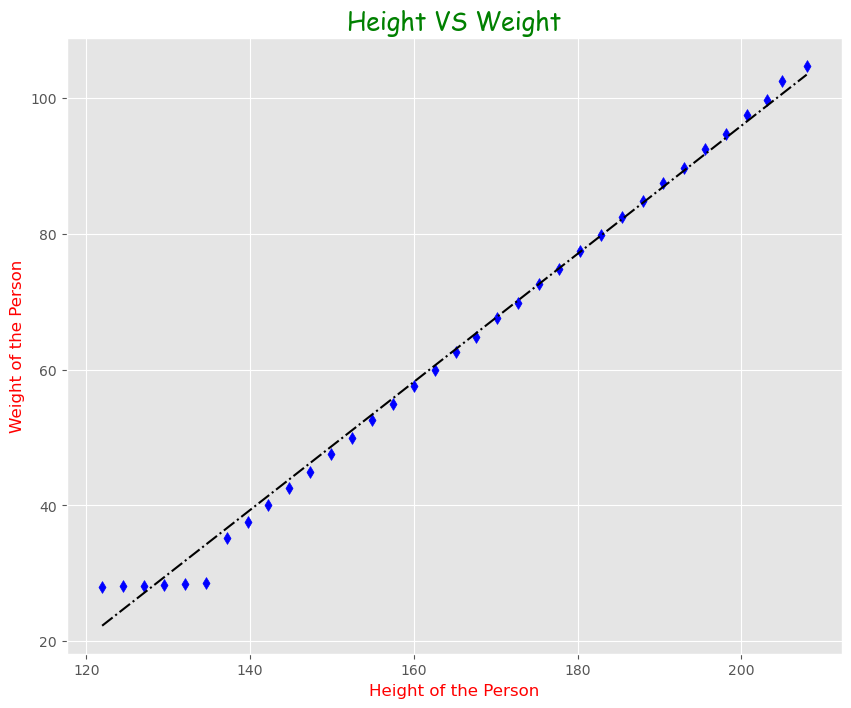

In [16]:
# Draw the line of Linear Regression
line = lin_regressor.coef_*x + lin_regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(10, 8))
plt.scatter(x, y, marker='d',color='blue')
plt.style.use('ggplot')
plt.title('Height VS Weight',fontsize=18,color='green',fontname='Comic Sans MS')  
plt.xlabel('Height of the Person',color='red')  
plt.ylabel('Weight of the Person',color='red')  
plt.plot(x, line,color="black",linestyle='-.')
plt.show()

### 6. Making Predictions

* The Model is trained,and it's time to make some predictions.

In [17]:
y_pred = lin_regressor.predict(X_test) 
df = pd.DataFrame({'Input [X_test]': list(X_test), 'Output [y_pred]': np.round(y_pred)})
df.head(10)

,Input [X_test],Output [y_pred]
0,[195.58],92.0
1,[172.72],70.0
2,[162.56],61.0
3,[193.04],89.0
4,[177.8],75.0
5,[160.02],58.0
6,[147.32],46.0
7,[127.0],27.0
8,[149.86],49.0
9,[190.5],87.0


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual_Weight': Y_test, 'Predicted_Weight': np.round(y_pred)}) #Comparing the accurracy  
df.head(10)

,Actual_Weight,Predicted_Weight
0,92.5,92.0
1,69.8,70.0
2,59.9,61.0
3,89.8,89.0
4,74.8,75.0
5,57.6,58.0
6,44.9,46.0
7,28.2,27.0
8,47.6,49.0
9,87.5,87.0


In [23]:
# Test with own data
Experience = int(input("Enter Your Height: "))
own_pred = lin_regressor.predict([[Experience]])
print("Your Height is {}cm.".format(Experience))
print("Predicted Weight: {}kg".format(round(own_pred[0])))

Enter Your Height: 190
Your Height is 190cm.
Predicted Weight: 87kg


#### Evaluating the model

In [24]:
from sklearn.metrics import r2_score
# r2 score for perfect model is 1.0
print("Models r2 score: ",r2_score(Y_test,y_pred)) 

Models r2 score:  0.9956378138174549


In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 1.0273075289221227
